In [1]:
import numpy as np
import pandas as pd
import math
import sklearn
import sklearn.preprocessing
import datetime
import os
import matplotlib.pyplot as plt

In [2]:
AAPdf = pd.read_csv("data/AAPL.csv")
googdf = pd.read_csv("data/GOOG.csv")
metadf = pd.read_csv("data/META.csv")
nflxdf = pd.read_csv("data/NFLX.csv")
tsladf = pd.read_csv("data/TSLA.csv")

In [3]:
AAPdf.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-11-05,51.075001,51.097500,49.542500,50.397499,48.267380,264654800
1,2018-11-06,50.480000,51.180000,50.422501,50.942501,48.789360,127531600
2,2018-11-07,51.492500,52.514999,51.032501,52.487499,50.269043,133697600
3,2018-11-08,52.494999,52.529999,51.687500,52.122501,50.093651,101450400
4,2018-11-09,51.387501,51.502499,50.562500,51.117500,49.127773,137463200


In [4]:
AAPdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1258 non-null   object 
 1   Open       1258 non-null   float64
 2   High       1258 non-null   float64
 3   Low        1258 non-null   float64
 4   Close      1258 non-null   float64
 5   Adj Close  1258 non-null   float64
 6   Volume     1258 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 68.9+ KB


In [5]:
googdf.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-11-05,52.750000,52.923500,51.062000,52.004501,52.004501,48828000
1,2018-11-06,51.973999,53.217251,51.903500,52.790501,52.790501,24666000
2,2018-11-07,53.450001,54.772999,53.294998,54.669498,54.669498,41168000
3,2018-11-08,54.569000,54.663502,53.610249,54.119999,54.119999,29764000
4,2018-11-09,53.699501,53.778000,52.655499,53.307499,53.307499,26864000


In [6]:
googdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1258 non-null   object 
 1   Open       1258 non-null   float64
 2   High       1258 non-null   float64
 3   Low        1258 non-null   float64
 4   Close      1258 non-null   float64
 5   Adj Close  1258 non-null   float64
 6   Volume     1258 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 68.9+ KB


In [7]:
metadf.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03
mean,229.744809,233.072114,226.623037,229.864547,229.864547,2.378351e+07
std,69.097208,69.629852,68.403369,69.020851,69.020851,1.559858e+07
min,90.080002,90.459999,88.089996,88.910004,88.910004,6.046300e+06
25%,177.952499,179.839996,175.577503,177.622501,177.622501,1.514428e+07
50%,212.455002,214.995002,209.934998,213.065002,213.065002,2.013960e+07
75%,286.220001,291.212509,281.462494,287.032494,287.032494,2.797518e+07
max,381.679993,384.329987,378.809998,382.179993,382.179993,2.323166e+08


In [8]:
def plot_stock_data(df):
    plt.figure(figsize=(15, 5))
    
    # Subplot 1: Stock Price
    plt.subplot(1, 2, 1)
    plt.plot(df['Open'].values, color='red', label='open')
    plt.plot(df['Close'].values, color='green', label='close')
    plt.plot(df['Low'].values, color='blue', label='low')
    plt.plot(df['High'].values, color='black', label='high')
    plt.title('Stock Price')
    plt.xlabel('Time [days]')
    plt.ylabel('Price')
    plt.legend(loc='best')

    # Subplot 2: Stock Volume
    plt.subplot(1, 2, 2)
    plt.plot(df['Volume'].values, color='black', label='volume')
    plt.title('Stock Volume')
    plt.xlabel('Time [days]')
    plt.ylabel('Volume')
    plt.legend(loc='best')

    plt.show()

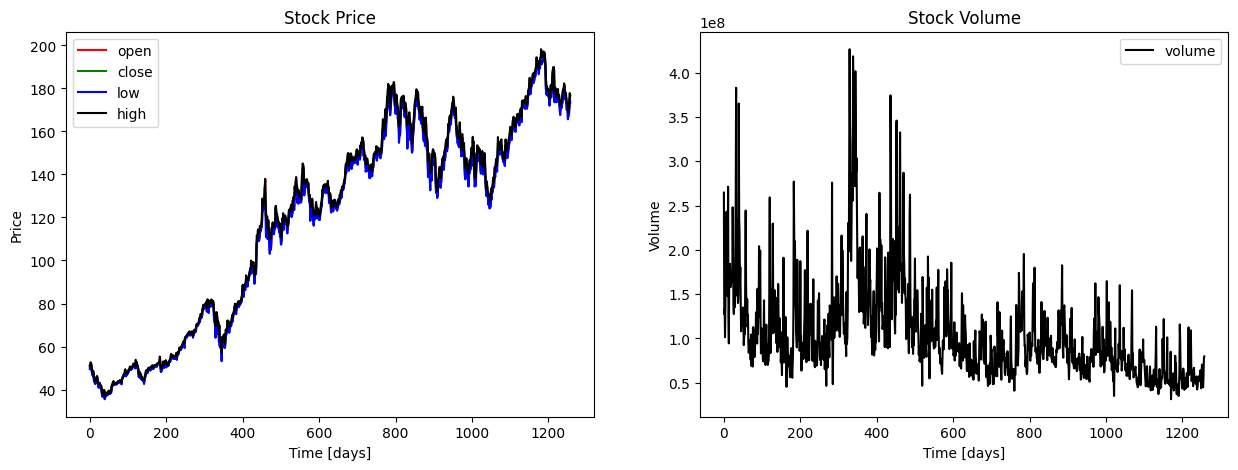

In [9]:
plot_stock_data(AAPdf)

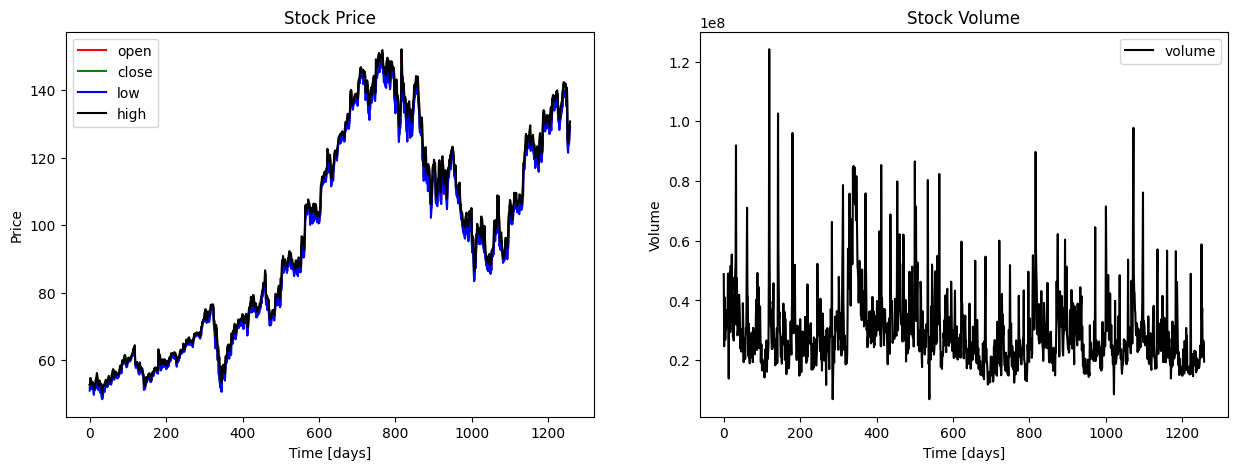

In [10]:
plot_stock_data(googdf)

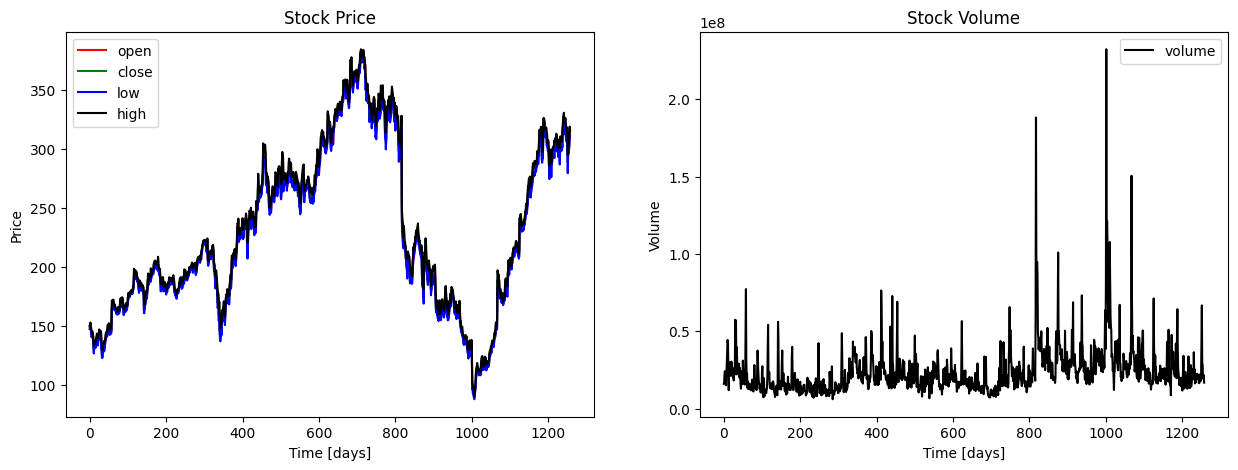

In [11]:
plot_stock_data(metadf)

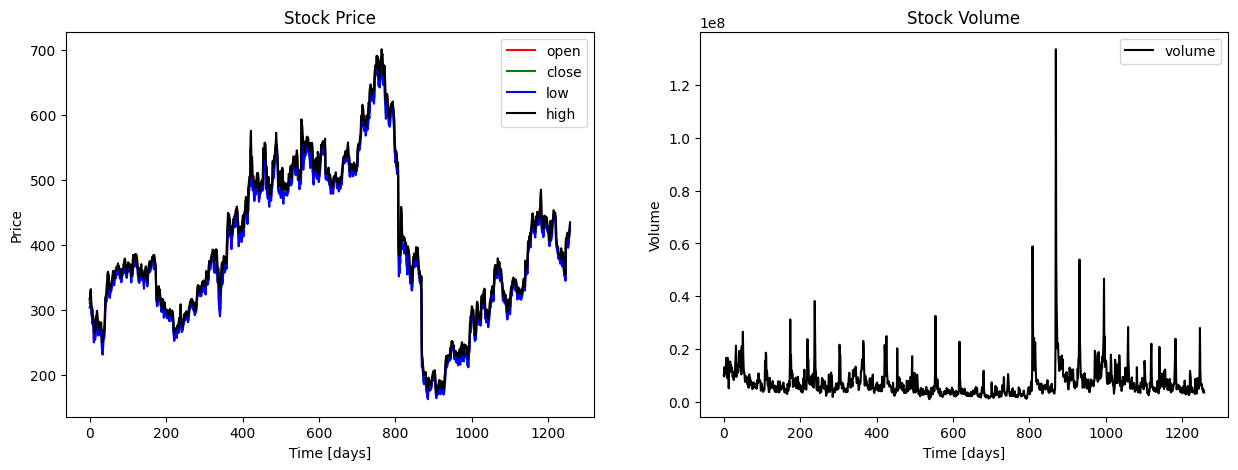

In [12]:
plot_stock_data(nflxdf)

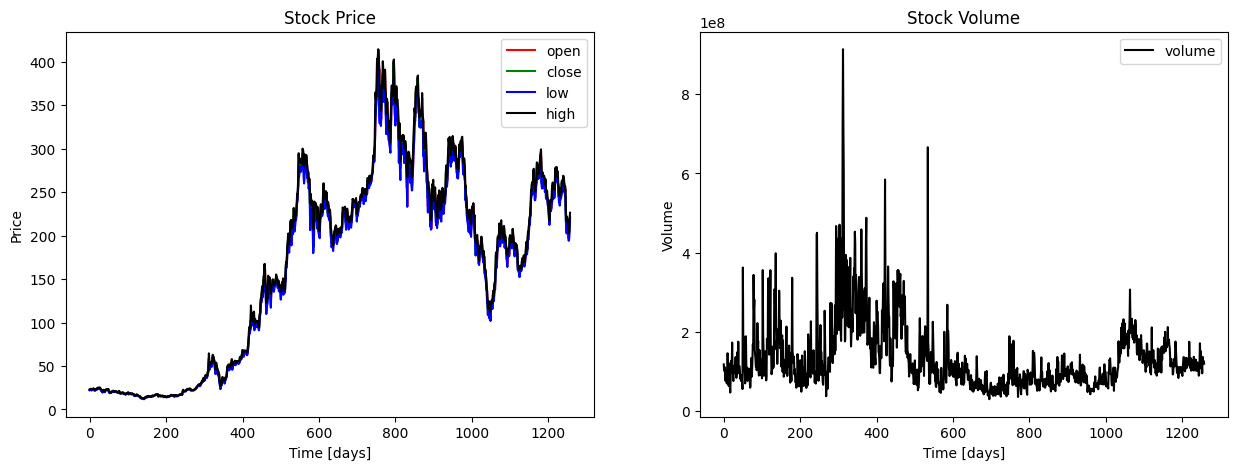

In [13]:
plot_stock_data(tsladf)

In [14]:
def normalize_data(df):
    min_max_scaler = sklearn.preprocessing.MinMaxScaler()
    df['Open'] = min_max_scaler.fit_transform(df.Open.values.reshape(-1,1))
    df['High'] = min_max_scaler.fit_transform(df.High.values.reshape(-1,1))
    df['Low'] = min_max_scaler.fit_transform(df.Low.values.reshape(-1,1))
    df['Close'] = min_max_scaler.fit_transform(df.Close.values.reshape(-1,1))
    df['Adj Close'] = min_max_scaler.fit_transform(df['Adj Close'].values.reshape(-1,1))
    return df

In [15]:
def load_data(stock, seq_len):
    data_raw = stock.to_numpy() 
    data = []
    
    # Create all possible sequences of length seq_len
    for index in range(len(data_raw) - seq_len): 
        data.append(data_raw[index: index + seq_len])
    
    data = np.array(data);
    valid_set_size = int(np.round(valid_percentage/100*data.shape[0]));  
    test_set_size = int(np.round(test_percentage/100*data.shape[0]));
    train_set_size = data.shape[0] - (valid_set_size + test_set_size);
    
    x_train = data[:train_set_size,:-1,:]
    y_train = data[:train_set_size,-1,:]
    
    x_valid = data[train_set_size:train_set_size+valid_set_size,:-1,:]
    y_valid = data[train_set_size:train_set_size+valid_set_size,-1,:]
    
    x_test = data[train_set_size+valid_set_size:,:-1,:]
    y_test = data[train_set_size+valid_set_size:,-1,:]
    
    return [x_train, y_train, x_valid, y_valid, x_test, y_test]

In [16]:
# List of DataFrames
dataframes = [AAPdf, googdf, metadf, tsladf, nflxdf]

# Column to drop
column_to_drop = 'Volume'

# Loop through the DataFrames and drop the specified column
for df in dataframes:
    if column_to_drop in df.columns:
        df.drop([column_to_drop], axis=1, inplace=True)

In [17]:
AAPdf.head()

,Date,Open,High,Low,Close,Adj Close
0,2018-11-05,51.075001,51.097500,49.542500,50.397499,48.267380
1,2018-11-06,50.480000,51.180000,50.422501,50.942501,48.789360
2,2018-11-07,51.492500,52.514999,51.032501,52.487499,50.269043
3,2018-11-08,52.494999,52.529999,51.687500,52.122501,50.093651
4,2018-11-09,51.387501,51.502499,50.562500,51.117500,49.127773


In [18]:
column_to_drop = 'Date'

# Loop through the DataFrames and drop the specified column
for df in dataframes:
    if column_to_drop in df.columns:
        df.drop([column_to_drop], axis=1, inplace=True)

In [19]:
googdf.head()

,Open,High,Low,Close,Adj Close
0,52.750000,52.923500,51.062000,52.004501,52.004501
1,51.973999,53.217251,51.903500,52.790501,52.790501
2,53.450001,54.772999,53.294998,54.669498,54.669498
3,54.569000,54.663502,53.610249,54.119999,54.119999
4,53.699501,53.778000,52.655499,53.307499,53.307499


In [20]:
for df in dataframes:
    normalize_data(df)

In [21]:
tsladf.head()

,Open,High,Low,Close,Adj Close
0,0.026607,0.026080,0.025922,0.027205,0.027205
1,0.026368,0.026882,0.026930,0.027148,0.027148
2,0.027081,0.027277,0.027727,0.028337,0.028337
3,0.027942,0.028338,0.029020,0.028880,0.028880
4,0.028026,0.027744,0.028477,0.028731,0.028731


In [22]:
test_percentage = 10
valid_percentage = 10
seq_len = 20

def split_data(df):
    x_train, y_train, x_valid, y_valid, x_test, y_test = load_data(df, seq_len)
    return x_train, y_train, x_valid, y_valid, x_test, y_test

In [23]:
X_AAPL_train, y_AAPL_train, X_AAPL_valid, y_AAPL_valid, X_AAPL_test, y_AAPL_test = split_data(AAPdf)
X_goog_train, y_goog_train, X_goog_valid, y_goog_valid, X_goog_test, y_goog_test = split_data(googdf)
X_meta_train, y_meta_train, X_meta_valid, y_meta_valid, X_meta_test, y_meta_test = split_data(metadf)
X_nflx_train, y_nflx_train, X_nflx_valid, y_nflx_valid, X_nflx_test, y_nflx_test = split_data(nflxdf)
X_tsla_train, y_tsla_train, X_tsla_valid, y_tsla_valid, X_tsla_test, y_tsla_test = split_data(tsladf)

In [24]:
X_AAPL_test.shape

(124, 19, 5)

In [25]:
import matplotlib.pyplot as plt

def plot_stock_data(df):
    plt.figure(figsize=(15, 5))
    plt.plot(df.Open.values, color='red', label='Open')
    plt.plot(df.Close.values, color='green', label='Close')
    plt.plot(df.Low.values, color='blue', label='Low')
    plt.plot(df.High.values, color='black', label='High')
    plt.plot(df['Adj Close'].values, color='cyan', label='Adj Close')
    plt.title('Stock Price')
    plt.xlabel('Time [Days]')
    plt.ylabel('Normalized Price')
    plt.legend(loc='best')
    plt.show()

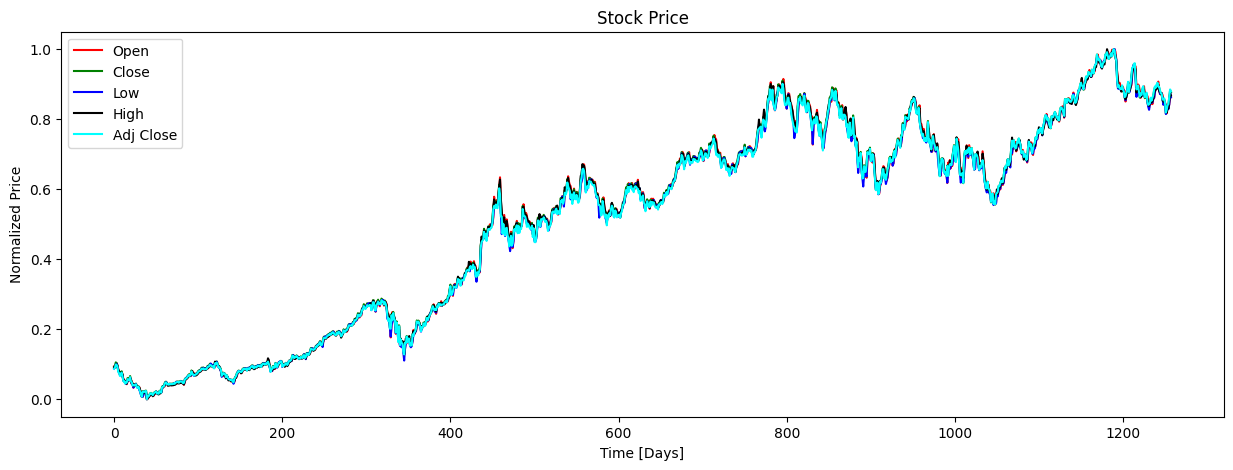

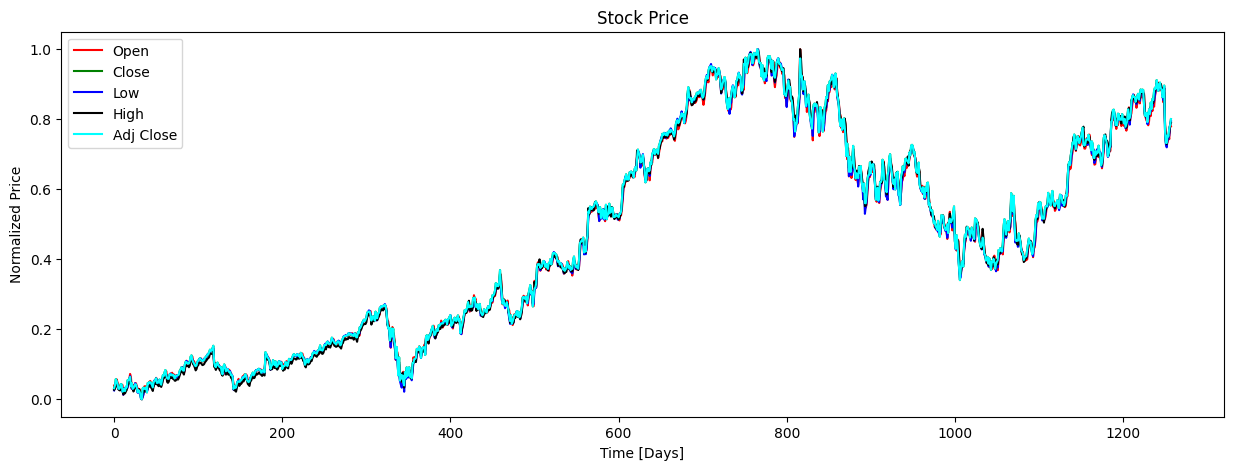

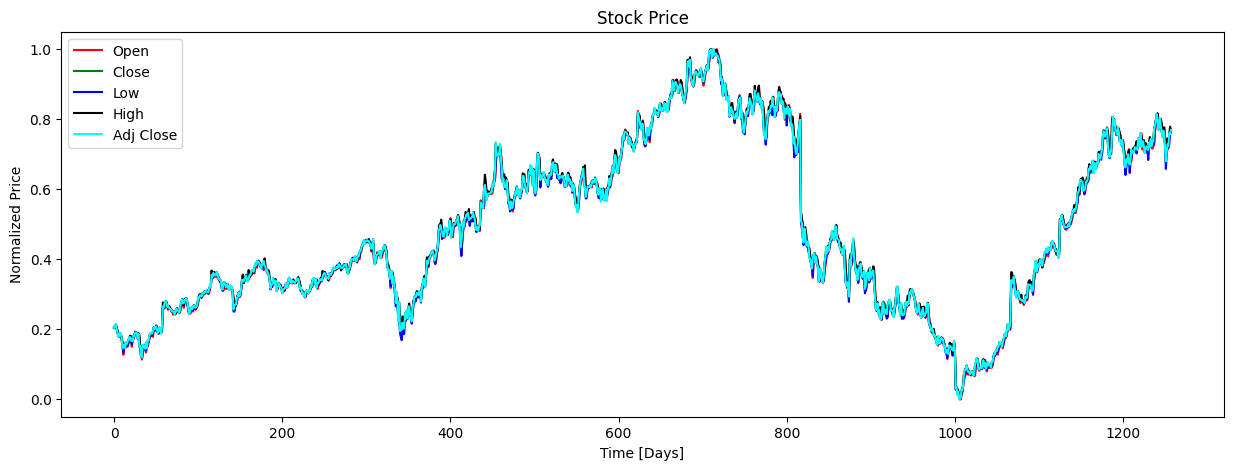

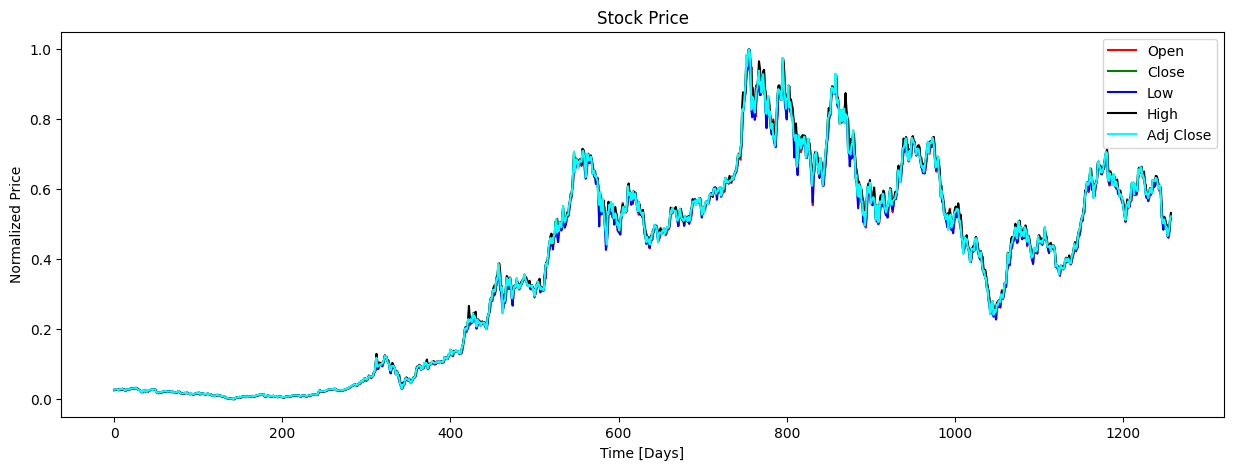

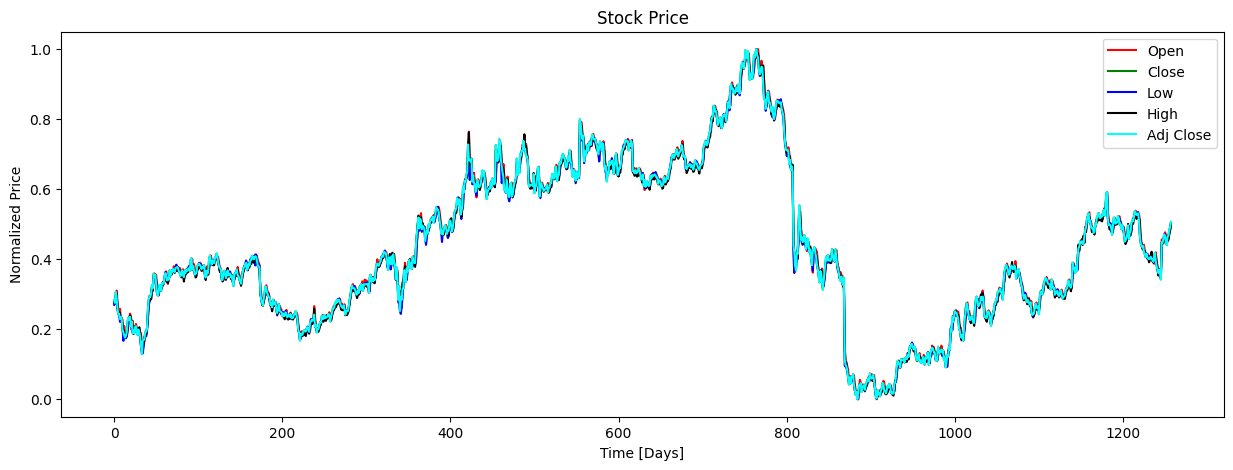

In [26]:
for df in dataframes:
    #dataframes = [AAPLdf, googdf, metadf, nflxdf, tsladf]
    plot_stock_data(df)

In [27]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader

# Define hyperparameters
n_steps = 20  # Number of time steps in the sequence
n_inputs = 5  # Number of input features
n_neurons = 128  # Number of neurons in each RNN layer
n_outputs = 5  # Number of output features
n_layers = 2  # Number of RNN layers
learning_rate = 0.001
batch_size = 32  # Adjust as needed
n_epochs = 50

X_AAPL_train = torch.tensor(X_AAPL_train, dtype=torch.float32)
y_AAPL_train = torch.tensor(y_AAPL_train, dtype=torch.float32)

# Create a DataLoader for batch loading
train_dataset = TensorDataset(X_AAPL_train, y_AAPL_train)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

# Define your RNN model
class MyRNN(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size):
        super().__init__()  
        self.rnn = nn.RNN(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        out, _ = self.rnn(x)
        out = self.fc(out[:, -1, :])  # Only use the output from the last time step
        return out

# Create an instance of the RNN model
model = MyRNN(input_size=n_inputs, hidden_size=n_neurons, num_layers=n_layers, output_size=n_outputs)

# Define the loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Training loop
for epoch in range(n_epochs):
    for batch_X, batch_y in train_loader:
        optimizer.zero_grad()
        output = model(batch_X)
        loss = criterion(output, batch_y)
        loss.backward()
        optimizer.step()

    print(f'Epoch [{epoch + 1}/{n_epochs}], Loss: {loss.item()}')

Epoch [1/50], Loss: 0.0014848755672574043
Epoch [2/50], Loss: 0.00034622897510416806
Epoch [3/50], Loss: 0.00035318193840794265
Epoch [4/50], Loss: 0.000696494011208415
Epoch [5/50], Loss: 0.0002675768337212503
Epoch [6/50], Loss: 0.00028796851984225214
Epoch [7/50], Loss: 0.0004918240592814982
Epoch [8/50], Loss: 0.0004783222102560103
Epoch [9/50], Loss: 0.0003972731065005064
Epoch [10/50], Loss: 0.0004127769498154521
Epoch [11/50], Loss: 0.0008740426856093109
Epoch [12/50], Loss: 0.00027869673795066774
Epoch [13/50], Loss: 0.0007954600150696933
Epoch [14/50], Loss: 0.0001656484673731029
Epoch [15/50], Loss: 0.000273735960945487
Epoch [16/50], Loss: 0.00020938823581673205
Epoch [17/50], Loss: 0.0004975921474397182
Epoch [18/50], Loss: 0.00023795312154106796
Epoch [19/50], Loss: 0.00035768450470641255
Epoch [20/50], Loss: 0.0005381140508688986
Epoch [21/50], Loss: 0.00016624390264041722
Epoch [22/50], Loss: 0.00021079738507978618
Epoch [23/50], Loss: 0.000181450872332789
Epoch [24/50],

Similarly you can do for other companies